In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
bank_data = pd.read_csv("bank-marketing.csv",delimiter=';')

In [3]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})

In [4]:
print(bank_data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [6]:
pre = pd.get_dummies(bank_data, columns=categorical_cols, drop_first=True)

In [7]:
X = pre.drop('y', axis=1)
y = pre['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = rf.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix",confusion_matrix(y_test,y_pred))

Confusion matrix [[7119  247]
 [ 434  438]]


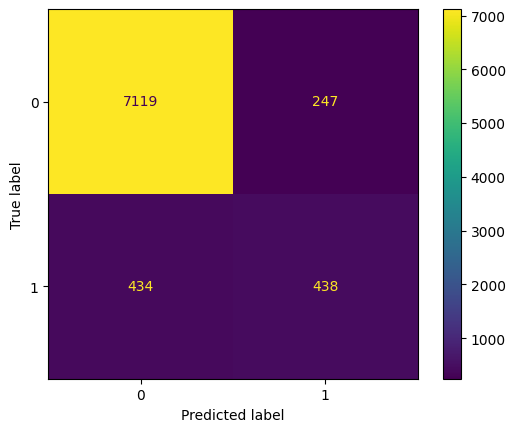

In [11]:
cm= confusion_matrix(y_test,y_pred)
display= ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()


In [12]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

accuracy= accuracy_score(y_test,y_pred)
f1score = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall= recall_score(y_test,y_pred)

print("Accuracy:",accuracy)
print("precision:",precision)
print("Recall:",recall)
print("f1_score:",f1score)


Accuracy: 0.9173343044428259
precision: 0.6394160583941606
Recall: 0.5022935779816514
f1_score: 0.5626204238921002


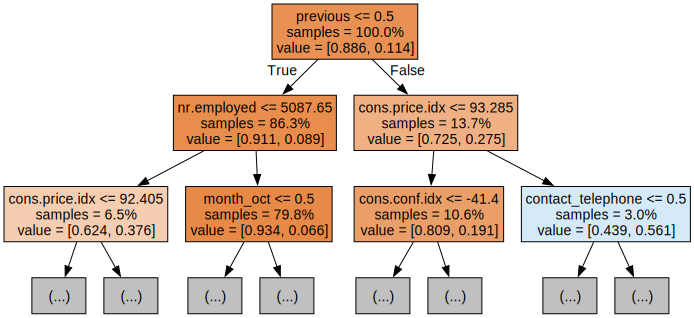

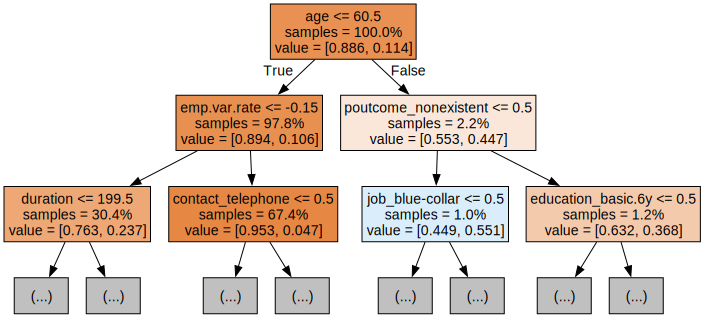

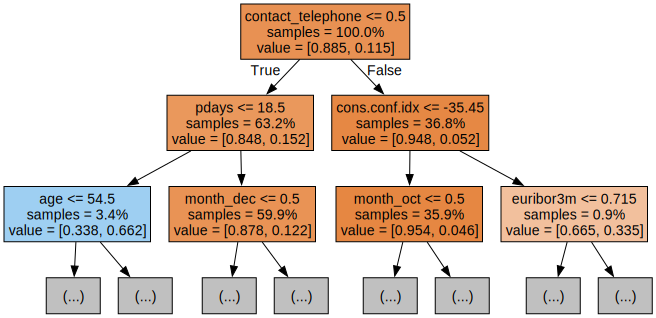

In [13]:
from IPython.display import display
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,feature_names=X_train.columns, filled=True,max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)